In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram

In [2]:
# Quantum XOR - really just CNOT
# input qubits: a, b
# output qubit: b
def qxor(circ, a, b) :
    circ.cx(a, b)

In [3]:
# Create registers and circuit
a = QuantumRegister(2, 'a')  # input
qc = QuantumCircuit(a)

In [4]:
# All combinations of input
qc.h(a)
qc.barrier()
# Build XOR circuit
qxor(qc, a[0], a[1])
qc.barrier()
# Measure the output
m = ClassicalRegister(1, 'output')
qc.add_register(m)
qc.measure(a[1],m)

In [5]:
# Simulate and show results
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=4096)  # shots default = 1024
result = job.result()
print(result.get_counts())

{'0': 2041, '1': 2055}


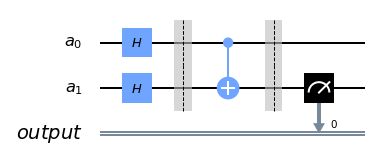

In [6]:
qc.draw(output='mpl')

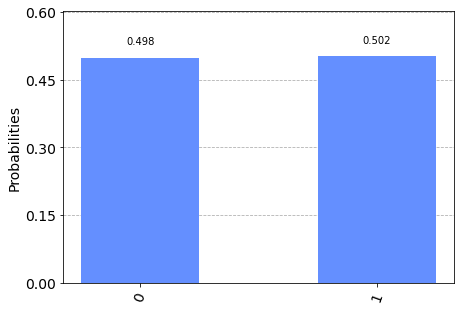

In [7]:
plot_histogram(result.get_counts())